In [1]:
import torch as t
from data import ChallengeDataset
from trainer import Trainer
from matplotlib import pyplot as plt
import numpy as np
import model
import pandas as pd
from sklearn.model_selection import train_test_split


# load the data from the csv file and perform a train-test-split
# this can be accomplished using the already imported pandas and sklearn.model_selection modules
# TODO
csv_path = 'data.csv'
tab = pd.read_csv(csv_path, sep=';')
train_tab, test_tab = train_test_split(tab, test_size=0.2, random_state=31)

# set up data loading for the training and validation set each using t.utils.data.DataLoader and ChallengeDataset objects
# TODO
train_dl = t.utils.data.DataLoader(ChallengeDataset(train_tab, 'train'), batch_size=10)
val_dl = t.utils.data.DataLoader(ChallengeDataset(test_tab, 'val'), batch_size=10)

/home/samil/miniconda3/envs/dl/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# set up a suitable loss criterion (you can find a pre-implemented loss functions in t.nn)
# set up the optimizer (see t.optim)
# create an object of type Trainer and set its early stopping criterion
# TODO
model = model.ResNet()
crit = t.nn.BCELoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.001)
trainer = Trainer(model, crit, optimizer, train_dl, val_dl, cuda=True)

In [3]:
# go, go, go... call fit on trainer
res = trainer.fit(epochs=100)

KeyboardInterrupt: 

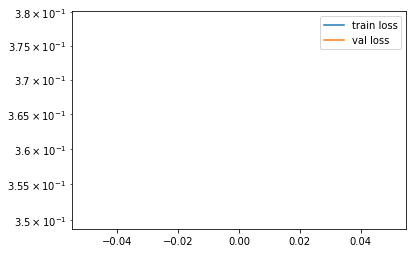

In [ ]:
# plot the results
plt.plot(np.arange(len(res[0])), res[0], label='train loss')
plt.plot(np.arange(len(res[1])), res[1], label='val loss')
plt.yscale('log')
plt.legend()
plt.savefig('losses.png')